<a href="https://colab.research.google.com/github/massirism/Codes/blob/main/prueba_knowledge_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import torch
from torch import nn
from torch.autograd import Variable


#import the required packages
import requests
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
class Topic():
  def __init__(self,name):
    self.name=name;
    #self.lista[] #Posible lista de papers.
  
  def muestra(self):
    print("El nombre del topic es: "+self.name)


class Paper():
  def __init__(self,title,abstract,link):
    self.title=title
    self.abstract=abstract
    self.url=link
    #self.list_words=[]  #Lista de tuplas (palabra,porcentaje)

  def ProbWord(self):
    text=self.abstract
    token=re.findall('\w+', text) #Tokenizo el texto
    #token[:10]

    words=[]
    for word in token:
      words.append(word.lower())    #Guardo el texto tokenizado en una lista de palabras
    #words[:8]

    nltk.download("stopwords")      #Descargo las stopwords
    # remove stop words
    sw=nltk.corpus.stopwords.words('english') #Están guardadas las stop words
    #sw[:5]

    words_ne=[]
    for word in words:
        if word not in sw:
             words_ne.append(word)    #Al texto le saco las stop words
    #words_ne[:5]    #Ya el texto sin stop words

    fdist_filtered = nltk.FreqDist(words_ne)  #Ya el texto filterado
    n_words=10
    sns.set_style('darkgrid')
    fdist_filtered.plot(n_words,title='Las '+str(n_words)+' palabras que mas se repiten en el paper: '+self.title)
    return(fdist_filtered)

  def muestra(self):
    print("Titulo: "+ self.title+"\n"+"Abstract: "+self.abstract+"\n"+ "url: "+self.url)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


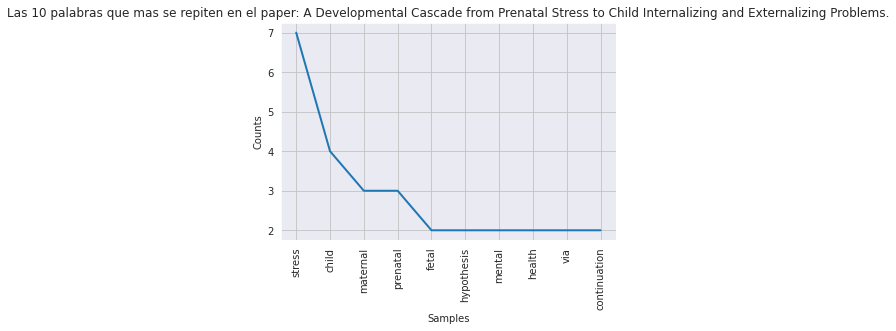

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


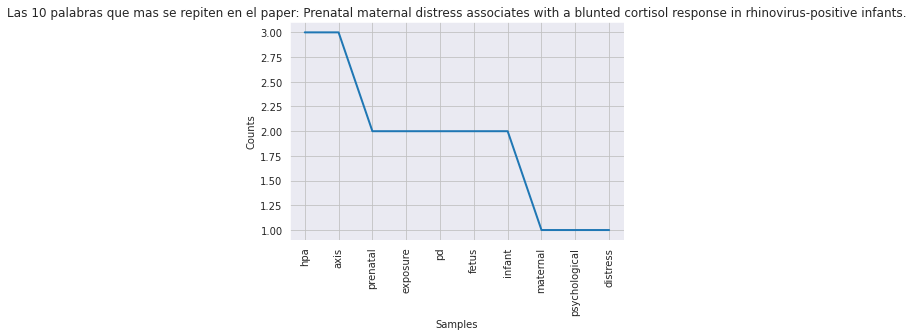

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


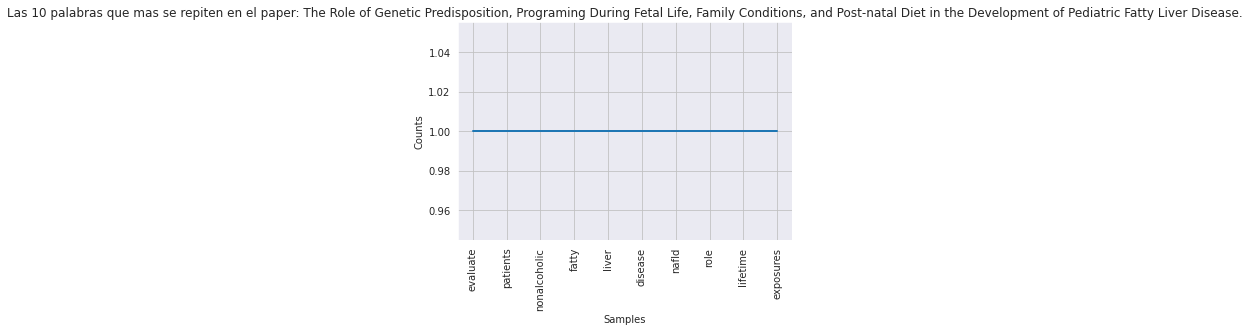

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


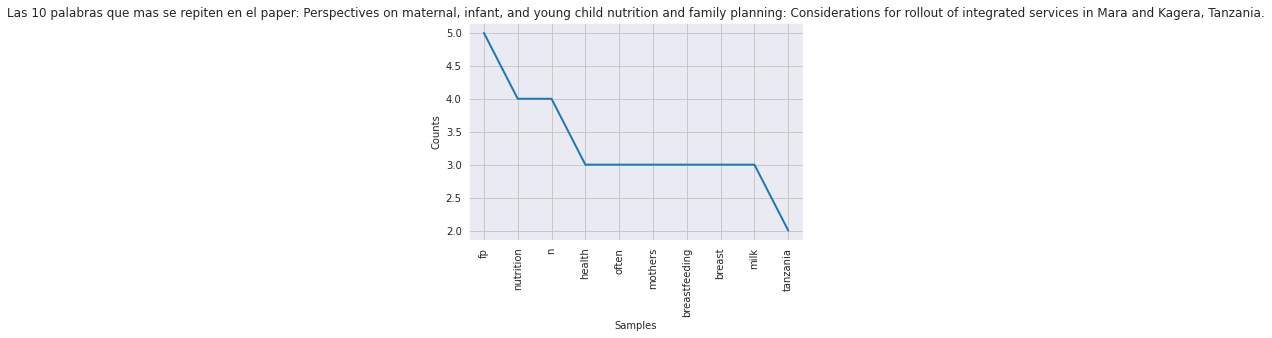

In [12]:
#Crep el paper "a"
titleA="The Role of Genetic Predisposition, Programing During Fetal Life, Family Conditions, and Post-natal Diet in the Development of Pediatric Fatty Liver Disease."
abstractA="To evaluate, in patients with nonalcoholic fatty liver disease (NAFLD), the role of lifetime exposures associated with genetic predisposition, family history (parental obesity, economic income), programming during fetal life (gestational age, birthweight), being breastfed or not, and later biomarkers of dietary habits and lifestyle in the development of fibrosis."
urlA="https://www.ncbi.nlm.nih.gov/pubmed/31128886"

titleB="Perspectives on maternal, infant, and young child nutrition and family planning: Considerations for rollout of integrated services in Mara and Kagera, Tanzania."
abstractB="In Lake Zone, Tanzania, low contraceptive prevalence, closely spaced births, and child stunting are common. Synergies exist between postpartum family planning (PPFP) and maternal, infant, and young child nutrition (MIYCN), yet health services are often provided in silos. This qualitative formative research study aimed to identify barriers and facilitating factors for optimal nutrition and PPFP practices in Mara and Kagera, Tanzania. Results informed the program design of an integrated nutrition and family planning (FP) implementation approach. The study involved in-depth interviews with mothers of infants under 1 year (n = 24), grandmothers (n = 12), health providers (n = 6), and traditional birth attendants (n = 12), and 14 focus group discussions with community health workers, fathers, and community leaders. Findings reveal that breastfeeding initiation was often delayed, and prelacteal feeding was common. Respondents linked insufficient breast milk to inadequate maternal nutrition-in terms of the quality of the diet and small quantities of food consumed by mothers. Breast milk insufficiency was addressed through early introduction of foods and liquids. Mothers believed that breastfeeding prevents pregnancy, regardless of the frequency or duration of breastfeeding, yet were generally not aware of the lactational amenorrhea method (LAM) of FP. Joint decision-making on FP was viewed as important, and women often discussed it with their partner. Future programming should address misconceptions about return to fecundity knowledge gaps and concerns about FP methods including LAM; and perceptions regarding insufficient breast milk and early introduction of foods which are impediments to optimal MIYCN and FP practices."
urlB="https://www.ncbi.nlm.nih.gov/pubmed/30748120"



pa=Paper(titleA,abstractA,urlA)
#pa.muestra()
#pa.ProbWord()

pb=Paper(titleB,abstractB,urlB)
#pb.muestra()
#pb.ProbWord()

#Estos datos los extraje del código de Pablo! playground.iypnb
abstract1="This study utilized a developmental cascade approach to test alternative theories about the underlying mechanisms behind the association of maternal prenatal stress and child psychopathology. The fetal programming hypothesis suggests that prenatal stress affects fetal structural and physiological systems responsible for individual differences in child temperament, which further increases risk for internalizing and externalizing problems. Interpersonal models of stress transmission suggest that maternal stress influences child mental health via early parenting behaviors. We also examined a continuation of stress hypothesis, in which prenatal stress predicts child mental health via the continuation of maternal stress in the postpartum period."
title1="A Developmental Cascade from Prenatal Stress to Child Internalizing and Externalizing Problems."
url1="https://www.ncbi.nlm.nih.gov/pubmed/31166597"


title2="Prenatal maternal distress associates with a blunted cortisol response in rhinovirus-positive infants."
abstract2="Prenatal exposure to maternal psychological distress (PD) may have programming effects on the fetus/infant hypothalamic-pituitary-adrenal (HPA) axis and subsequently on the development of the fetus' immune function. Therefore, our aim was to study whether prenatal exposure to PD is related to early infant HPA axis reactivity in the context of a subclinical rhinovirus infection that challenges infants HPA axis postnatally."
url2="https://www.ncbi.nlm.nih.gov/pubmed/31146139"


p1=Paper(title1,abstract1,url1)
p2=Paper(title2,abstract2,url2)


#Un poco de análisis de texto del abstract
p1.ProbWord()
p2.ProbWord()

pa.ProbWord()
pb.ProbWord()

#Creo los topic
topic1=Topic("Topic1")
#topic.muestra()
topic2=Topic("Topic2")

Para armar el grafo y testear cree este ejemplo:

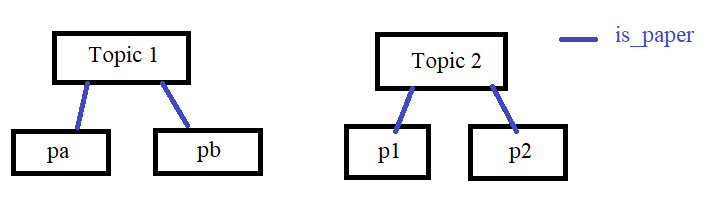

In [4]:
graph = [
     # <subject, predicate, object>
   # ("topics","is_topic","topic_1") #Esto será tomado en cuenta en el momento que tenga una super clase que tenga todos los tópicos
    (topic1,"is_paper",pa), #Tendría problema porque lo estoy armando yo, tendría que saber cuantos papers hay si quisiera hacerlo automático
    (topic1,"is_paper",pb), #Se podrá ver después porque creo que este código lo uniré al playground que hizo Pablo
    
    (topic2,"is_paper",p1),
    (topic2,"is_paper",p2)


]

In [5]:
class KnowledgeGraphEmbeddings(nn.Module):
    def __init__(self, graph, embedding_size = 3):
        super(KnowledgeGraphEmbeddings, self).__init__()
        
        entities = []
        relations = []
        for fact in graph:
            source, relation, target = fact[0], fact[1], fact[2]
            entities.append(source)
            entities.append(target)
            relations.append(relation)

        self.entities = list(set(entities))
        self.relations = list(set(relations))
        self.entities2id = { ent:i for i, ent in enumerate(self.entities) } 
        self.relations2id = { rel:i for i, rel in enumerate(self.relations) } 
        
        self.entity_embeddings = nn.Embedding(len(self.entities2id), embedding_size)
        self.relation_embeddings = nn.Embedding(len(self.relations2id), embedding_size)
        self.graph = graph
        
        #Se etrena con relaciones que si existen!
    def positive(self, fact):
        source, relation, target = fact[0], fact[1], fact[2]
        source_id = self.entities2id[source]
        target_id = self.entities2id[target]
        relation_id = self.relations2id[relation]
        
        source_id = Variable(torch.LongTensor([source_id])).view(1, -1)
        target_id = Variable(torch.LongTensor([target_id])).view(1, -1)
        relation_id = Variable(torch.LongTensor([relation_id])).view(1, -1)

        source_embedding = self.entity_embeddings(source_id)
        target_embedding = self.entity_embeddings(target_id)
        relation_embedding = self.entity_embeddings(relation_id)
        score = torch.dist(source_embedding + relation_embedding, target_embedding)
        #print('positive', source, relation, target, score.data[0])
        return score
    

    #Relaciones que no existen, por ejemplo la relación entre los papers.
    def negative(self):
        # Sample until we find an invalid fact
        while True:
            random_source_id = random.randint(0, len(self.entities2id) - 1)
            random_relation_id = random.randint(0, len(self.relations2id) - 1)
            random_target_id = random.randint(0, len(self.entities2id) - 1)
            
            source = self.entities[random_source_id]
            target = self.entities[random_target_id]
            relation = self.relations[random_relation_id]
            if (source, relation, target) not in graph:
                break
        
        source_id = Variable(torch.LongTensor([random_source_id])).view(1, -1)
        relation_id = Variable(torch.LongTensor([random_relation_id])).view(1, -1)
        target_id = Variable(torch.LongTensor([random_target_id])).view(1, -1)
        
        source_embedding = self.entity_embeddings(source_id)
        relation_embedding = self.entity_embeddings(relation_id)
        target_embedding = self.entity_embeddings(target_id)
        
        score = torch.dist(source_embedding + relation_embedding, target_embedding)
        #print('negative', self.entities[random_source_id], self.relations[random_relation_id], self.entities[random_target_id], score.data[0])
        return score

    def forward(self, fact, margin=1.0):
        positive_score = self.positive(fact)
        negative_score = self.negative()
        loss = torch.max((positive_score - negative_score + margin).sum(), Variable(torch.FloatTensor([0])))
        #print('%.2f - %.2f + %.2f = %.2f' %(positive_score.data[0], negative_score.data[0], margin, loss.data[0]))

        return loss
    
    def score(self, fact):
        return self.positive(fact)




In [6]:
#La idea es entrenar con relaciones
#Despues veo el score que arrojan.
def train(fact, embedding_model, optimizer):
    avg_loss = 0.
    # 10 training cycles for this fact, with negative sampling
    for i in range(len(embedding_model.entities) * len(embedding_model.entities) * len(embedding_model.relations)):
        embedding_model.zero_grad()
        loss = embedding_model(fact)
        loss.backward()
        optimizer.step()
        avg_loss += loss.data[0]
    return avg_loss / 10

In [7]:
embedding_model = KnowledgeGraphEmbeddings(graph)
optimizer = torch.optim.Adam(embedding_model.parameters(), lr=0.001)
losses = []
epochs = 50
for e in range(epochs):
    total_loss = 0.
    for fact in graph:
        loss = train(fact, embedding_model, optimizer)
        total_loss += loss
    losses.append(total_loss)

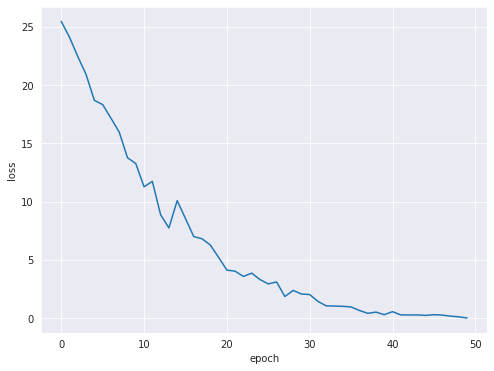

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6),)
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss');

In [9]:
#Muestro que tan a fines son los otros papers (pa y pb) con el topic 2
print(embedding_model.score((topic2,'is_paper',pa)))
print(embedding_model.score((topic2,'is_paper',pb)))

#Lo mismo pero para el topic1
print(embedding_model.score((topic1,'is_paper',p1)))
print(embedding_model.score((topic1,'is_paper',p2)))

print("Con sus propios papers...")

#Afinidad a sus propios tópicos!
print(embedding_model.score((topic1,'is_paper',pa)))
print(embedding_model.score((topic1,'is_paper',pb)))


print(embedding_model.score((topic2,'is_paper',p1)))
print(embedding_model.score((topic2,'is_paper',p2)))

#(recuerde, de acuerdo con nuestra formulación, una puntuación más baja = más probable).
# Link donde saqué Knowledge Graph Inference with Neural Embeddings:
#     https://m.mage.ai/knowledge-graph-inference-with-neural-embeddings-412c85da7f1b
#     El repo: https://github.com/czhu12/blogexamples/blob/master/knowledge_graph_embeddings.ipynb


tensor(3.2617, grad_fn=<DistBackward0>)
tensor(2.1465, grad_fn=<DistBackward0>)
tensor(3.0791, grad_fn=<DistBackward0>)
tensor(2.8208, grad_fn=<DistBackward0>)
COMO VAN
tensor(1.0206, grad_fn=<DistBackward0>)
tensor(1.0647, grad_fn=<DistBackward0>)
tensor(0.8029, grad_fn=<DistBackward0>)
tensor(0.9679, grad_fn=<DistBackward0>)


Los resultados muestran que si los diferencia pero en la afinidad igual duda, debería ser un poco más baja pero si todos los papers trtan sobre embarazos entonces quizá es ententible que llegue a 1.

> Bloc con sangría




## No se si se borra o no así que dejaré esto por acá así no pierdo las modificaciones.

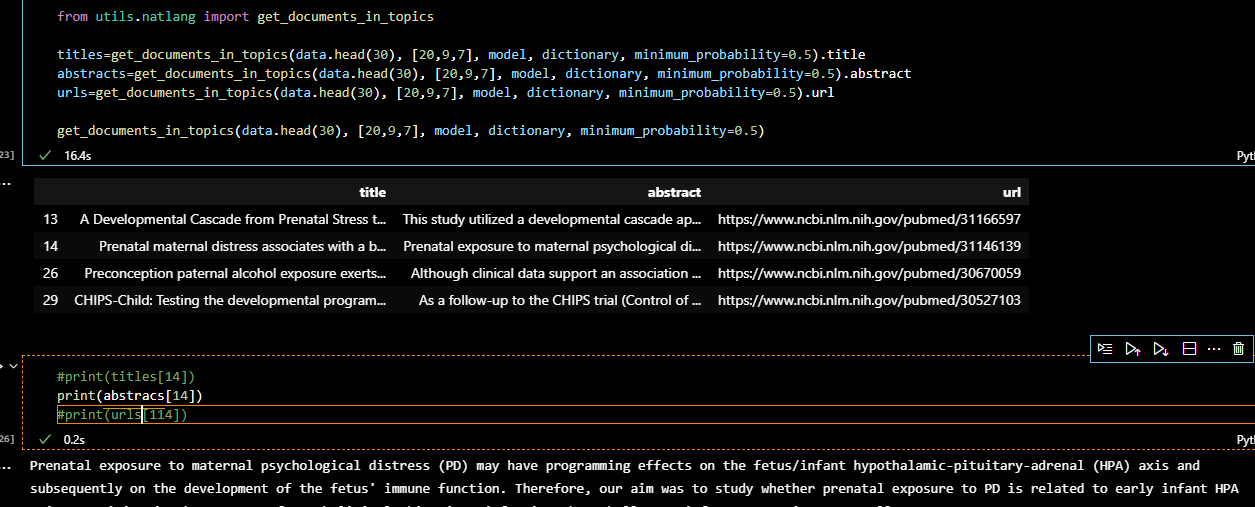